 Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## choose which distributions to use 

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']


## and which mean to give it

In [3]:
mymean = 500

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [4]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


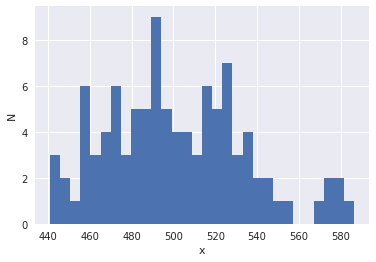

In [5]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 501.38, standard deviation: 33.13


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [7]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


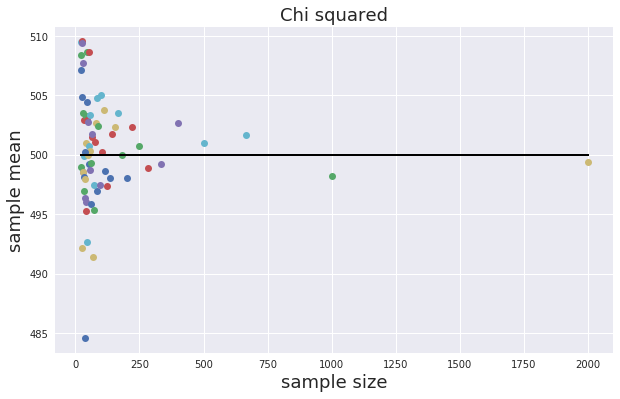

In [8]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: [describe what you see and how it relates to the law of large numbers]

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


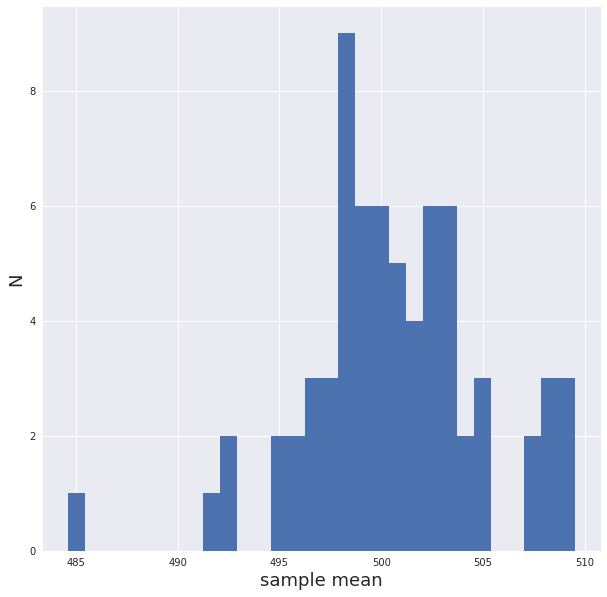

In [9]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: [...]

# Do it for the Normal distribution

In [10]:
#resetting our variables for the normal distribution
mymean = 100
df = mymean
md = {}
md['normal'] = np.random.normal(df, size=100)

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


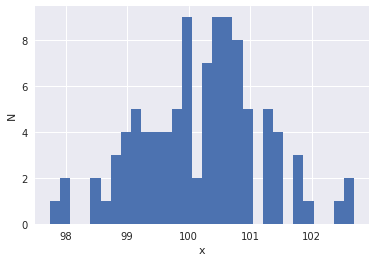

In [11]:
pl.hist(md['normal'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 2: Normal distribution: df = 100, N = 100

In [12]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['normal'].mean(), md['normal'].std()))

Normal mean: 100.21, standard deviation: 0.98


In [13]:
# Shaping our array
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


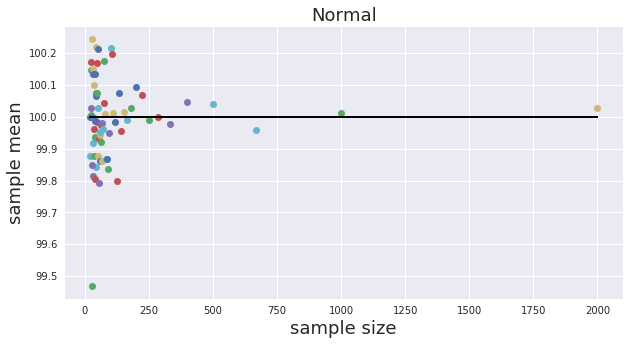

In [14]:
md['normal'] = {}

for n in mysize:
    md['normal'][n] = np.random.normal(df, size = n)

md['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        
        axnormal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

#### Figure 2: Our expected mean value is 100, and as our sample size grows we approach that value. The Law of Large Numbers dictates that as the number of trials of an experiment grows, the result should get closer and closer to the expected value (we see this in our mean approaching 100).

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


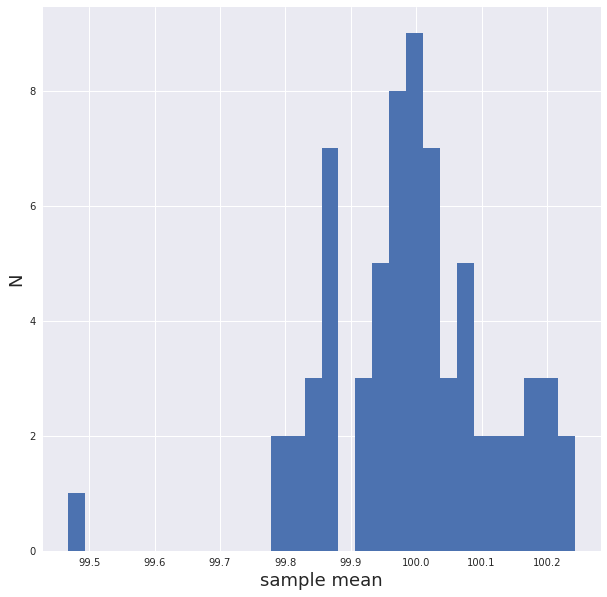

In [15]:
allmeans = list(md['normal']['means'].values())

pl.figure(figsize = (10, 10))
pl.hist(allmeans, bins = 30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

#### Figure 3: Shape looks good-- just like a normal distribution should.

# Do it for the Poisson distribution

In [16]:
#resetting our variables for the poisson distribution
mymean = 100
lam = mymean
md = {}
md['pois'] = np.random.poisson(lam, size=100)

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


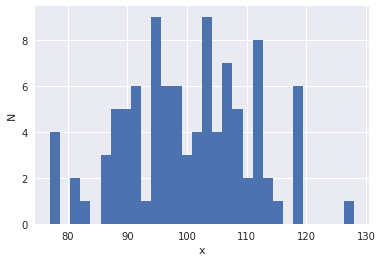

In [17]:
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 2: Poisson distribution: lam = 100, N = 100

In [18]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 100.11, standard deviation: 10.60


In [19]:
# Shaping our array
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


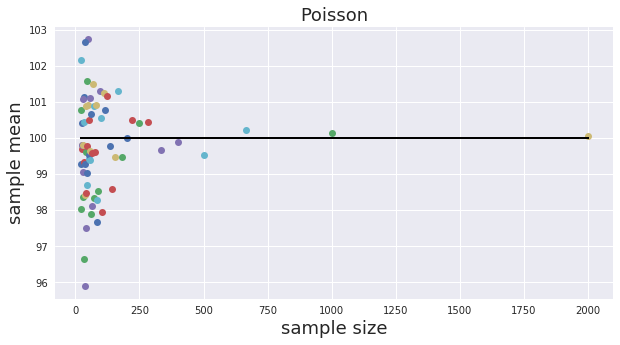

In [20]:
md['pois'] = {}

for n in mysize:
    md['pois'][n] = np.random.poisson(df, size = n)

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

#### Figure 2: Our expected mean value is 100, and as our sample size grows we approach that value. The Law of Large Numbers dictates that as the number of trials of an experiment grows, the result should get closer and closer to the expected value (we see this in our mean approaching 100).

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


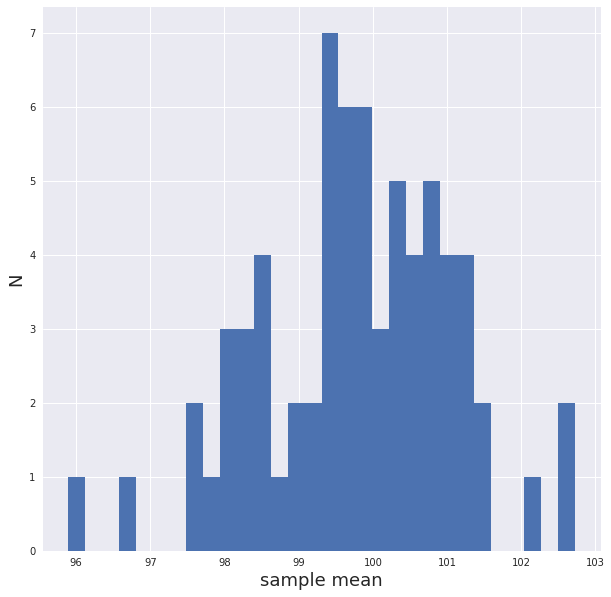

In [21]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize = (10, 10))
pl.hist(allmeans, bins = 30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

#### Figure 3: Distribution looks good!

# Do it for the Binomial distribution

In [22]:
#resetting our variables for the binomial distribution
mymean = 200
bin_n = mymean
bin_p = .5
md = {}
md['binomial'] = np.random.binomial(bin_n, bin_p, size=100)

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


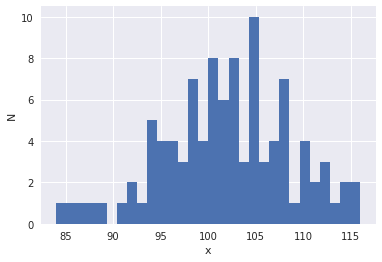

In [23]:
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 2: Binomial distribution: n = 200, p = .5, size = 100

In [24]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 101.92, standard deviation: 6.75


In [25]:
# Shaping our array
mysize = (20000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[20000 10000  6666  5000  4000  3333  2857  2500  2222  2000  1818  1666
  1538  1428  1333  1250  1176  1111  1052  1000   952   909   869   833
   800   769   740   714   689   666   645   625   606   588   571   555
   540   526   512   500   487   476   465   454   444   434   425   416
   408   400   392   384   377   370   363   357   350   344   338   333
   327   322   317   312   307   303   298   294   289   285   281   277
   273   270   266   263   259   256   253   250   246   243   240   238
   235   232   229   227   224   222   219   217   215   212   210   208
   206   204   202] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


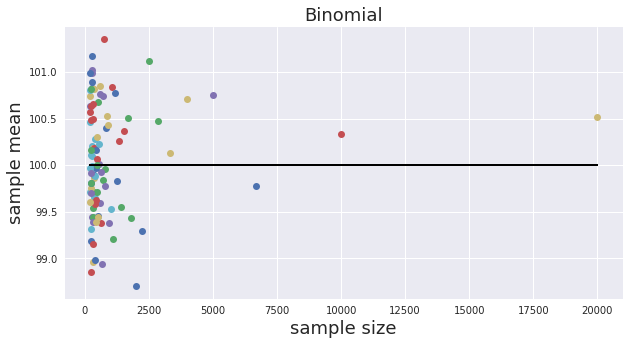

In [26]:
md['binomial'] = {}

for n in mysize:
    md['binomial'][n] = np.random.binomial(bin_n, bin_p, size=100)

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

#### Figure 2: Our expected mean value is 100, but unlike other tests we don't approach that until we reach a sample size of 20,000. However, the Law of Large Numbers still seems to apply-- just much larger this time!

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


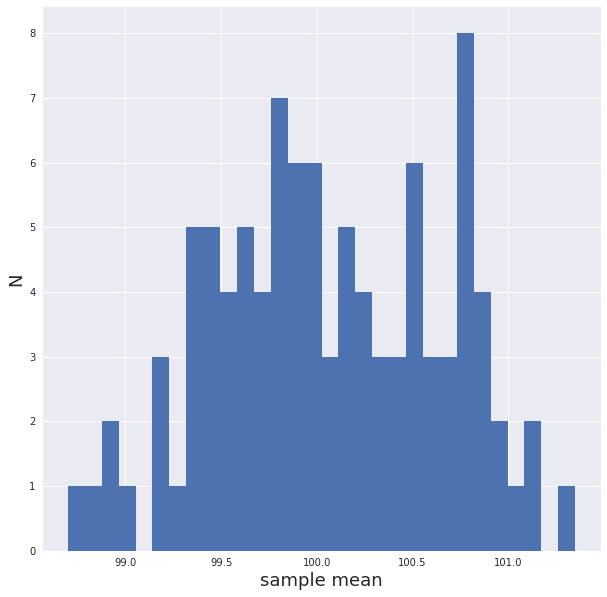

In [27]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize = (10, 10))
pl.hist(allmeans, bins = 30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

#### Figure 3: Distribution looks good!

# Do it for another distribution

In [28]:
#resetting our variables for the Cauchy distribution
md = {}
s = np.random.standard_cauchy(1000)
s = s[(s>-25) & (s<25)]
md['cauchy'] = s

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


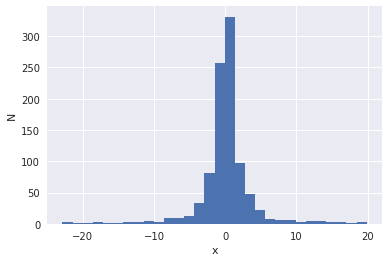

In [29]:
pl.hist(md['cauchy'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 2: Cauchy distribution: s = 1000(?) [confused about how this works]

In [30]:
print ("Cauchy mean: %.2f, standard deviation: %.2f"%(md['cauchy'].mean(), md['cauchy'].std()))

Cauchy mean: 0.07, standard deviation: 3.96


In [31]:
# Shaping our array
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


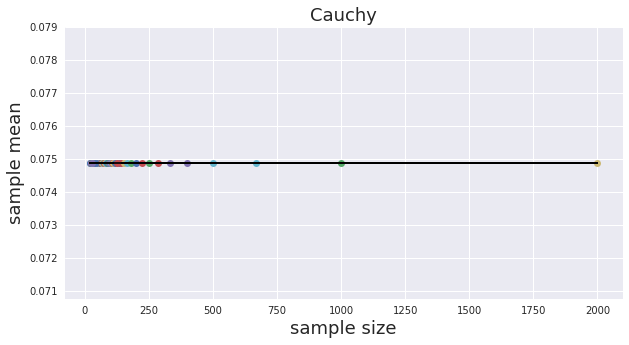

In [32]:
md['cauchy'] = {}

for n in mysize:
    md['cauchy'][n] = s

md['cauchy']['means'] = {}
axcauchy_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)

for nn in md['cauchy']:
    if not type(nn) == str:
        md['cauchy']['means'][nn] = md['cauchy'][nn].mean()
        
        axcauchy_mu_n.plot(nn, md['cauchy']['means'][nn], 'o')
        axcauchy_mu_n.set_xlabel('sample size', fontsize=18)
        axcauchy_mu_n.set_ylabel('sample mean', fontsize=18)
        axcauchy_mu_n.set_title('Cauchy', fontsize=18)
        axcauchy_mu_n.plot([min(mysize), max(mysize)], [s.mean(), s.mean()], 'k')

#### Figure 2: Our expected mean value is 0, and as our sample size is constant at that value. The Law of Large Numbers seems to fail here, as there is no change...

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


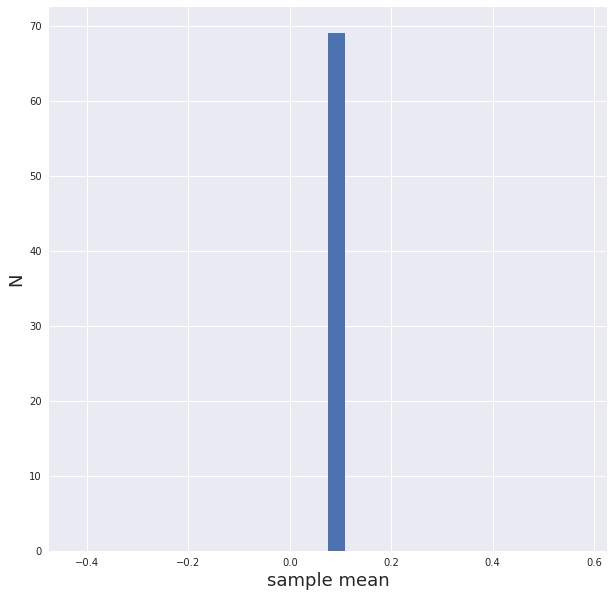

In [33]:
allmeans = list(md['cauchy']['means'].values())

pl.figure(figsize = (10, 10))
pl.hist(allmeans, bins = 30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

#### Figure 3: Honestly, more confused here than I've been in a long time!